In [2]:
import pandas as pd
import numpy as np

In [1]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import warnings
warnings.filterwarnings('ignore')
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

In [4]:
import seaborn as sns

In [66]:
df = pd.read_csv('finaldataset.csv')

In [67]:
df.head() #after word tokenization

,reviews,Price,Brand,Ratings
0,"['boss', 'of', 'all', 'bluetooth', 'speakerboo...","₹19,999",Home Theatre,5
1,"['amazing', 'speaker', 'with', 'superb', 'bass...","₹6,499",Yes,5
2,"['excellent', 'product', 'in', 'budget', 'i', ...","₹1,999",Home Theatre,5
3,"['sound', 'quality', 'is', 'good', 'and', 'lou...","₹2,799",Home Theatre,5
4,"['the', 'best', 'product', 'in', 'low', 'price...","₹2,499",No,5


In [53]:
df['reviews'] = np.where(df['reviews'].isnull(),'null',df['reviews'])

# Data PreProcessing 

1. Converting to lower case
2. Remove stopwords
3. Word lemmatization
4. Spelling correction
5.Remove emojis
6. Remove numbers
7. Remove single character
8. Treat Null values

In [5]:
df['reviews'] = df['reviews'].str.lower()

In [6]:
df['reviews'] = df['reviews'].str.translate(str.maketrans(' ',' ',string.punctuation))

In [11]:
stop_words = set(stopwords.words('english'))

df['review'] = df['review'].apply(lambda x:[term for term in x if term not in stop_words])

In [29]:
lemmatizer = WordNetLemmatizer()
def word_lemmatizer(text):
    lem = [lemmatizer.lemmatize(i) for i in text]
    return lem

In [30]:
df['review'] = df['review'].apply(lambda x: word_lemmatizer(x))


In [9]:
df['review'] = df['reviews'].apply(nltk.word_tokenize)

In [16]:
from textblob import TextBlob

In [ ]:
for i in df['review']:
    for j in i:
        j = TextBlob(j)
        j = j.correct()

In [86]:
df.to_csv(r'C:\Users\dell\Documents\ratingcsv\ppf2.csv',index=False,header=True)

In [14]:
def remove_emoji_(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [58]:
for i in df.columns:
    print(i,df[i].isnull().sum())

reviews 0
Price 0
Brand 320
Ratings 0
review 0


In [15]:
import re

In [16]:
df['review'] = df.review.astype(str).map(lambda x: remove_emoji_(x))

In [17]:
def remove_numbers(text):
    number_pattern = r'\d+'
    without_number = re.sub(pattern=number_pattern,repl=" ", string=text)
    return without_number

In [18]:
df['review'] = df.review.astype(str).map(lambda x: remove_numbers(x))

In [19]:
def remove_single_char(text):
    single_char_pattern = r'\s+[a-zA-Z]\s+'
    without_sc = re.sub(pattern=single_char_pattern, repl=" ", string=text)
    return without_sc

In [20]:
df['review'] = df.review.astype(str).map(lambda x: remove_single_char(x))

# Rough

In [22]:
from gensim.models import Word2Vec
import gensim

In [23]:
model = gensim.models.Word2Vec(
    window=10,
    min_count=2,
    workers=4,
)

In [24]:
model.build_vocab(df['review'], progress_per=1000)

In [25]:
model.train(df['review'], total_examples=model.corpus_count, epochs=model.epochs)

(13792569, 78470070)

# Handling ratings

In [6]:
df['Ratings'] = np.where(df['Ratings']=='-',0,df['Ratings'])  #for converting ratings to float

In [7]:
df['Ratings'] = df['Ratings'].astype(float) 

In [63]:
df['Ratings'] = np.where(df['Ratings'].isnull(),df['Ratings'].median(),df['Ratings'])

In [12]:
df['Ratings'] = np.where(df['Ratings']==0,df['Ratings'].median(),df['Ratings'])  #'-' to 0 then replaced with median

In [14]:
for i in df['Ratings']:
    i = round(i)   #rounding off the values

In [15]:
pd.set_option('display.max_rows',None)

In [55]:
from sklearn.preprocessing import LabelEncoder
lab_en = LabelEncoder()                     
df['Ratings'] =lab_en.fit_transform(df['Ratings'])

In [59]:
df['Ratings'].value_counts()

3    10385
4     5532
2     1185
0      230
1       81
5       71
Name: Ratings, dtype: int64

<AxesSubplot:xlabel='Ratings', ylabel='count'>

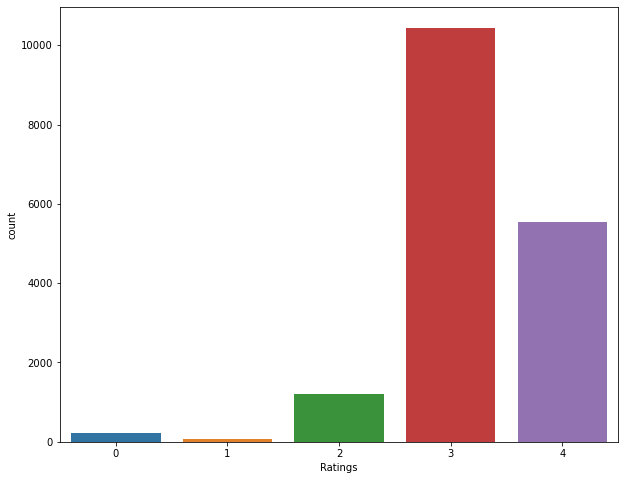

In [64]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.countplot(df['Ratings'])

In [115]:
!pip install wordcloud

  Using cached wordcloud-1.8.1-cp38-cp38-win_amd64.whl (155 kB)


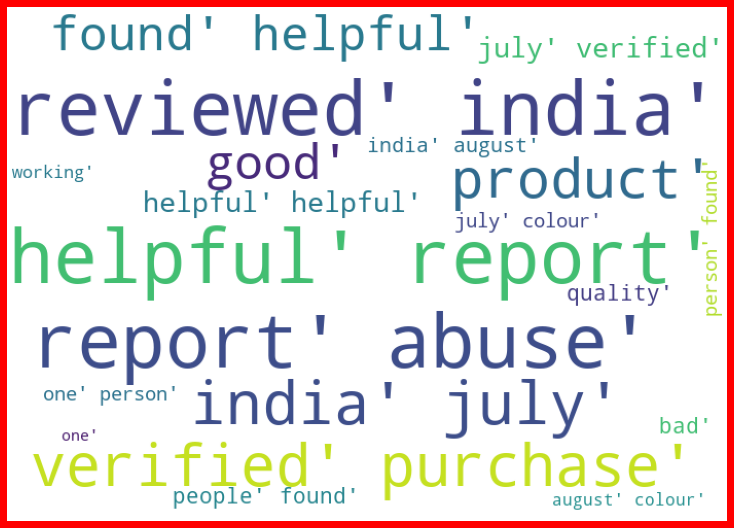

In [118]:
from wordcloud import WordCloud

#Top 20 frequent words
rating = df['review'][df['Ratings']==1]

s = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(rating))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(s)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [46]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [47]:
tf_vec = TfidfVectorizer()

naive = MultinomialNB()

In [48]:
feature = tf_vec.fit_transform(df['review'])

Separating label and reviews

In [49]:
X = feature
y = df['Ratings']

In [72]:
X_train,x_test,Y_train,y_test = train_test_split(X,y,random_state=42)

naive.fit(X_train,Y_train)

y_pred= naive.predict(x_test)

print(accuracy_score(y_test,y_pred))

0.7160832761381835


In [76]:
#finding  best random state

for i in range(1,50):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.33,random_state=i)
    l = MultinomialNB()
    l.fit(x_train,y_train)
    p = l.predict(x_test)
    p1 = l.predict(x_train)
    print('r2 score of test data at random state,',i,' ',accuracy_score(p,y_test))
    print('r2 score of train data at random state,',i,' ',accuracy_score(p1,y_train))

r2 score of test data at random state, 1   0.7199306759098787
r2 score of train data at random state, 1   0.7471401741505891
r2 score of test data at random state, 2   0.7150779896013865
r2 score of train data at random state, 2   0.753115929656821
r2 score of test data at random state, 3   0.7031195840554593
r2 score of train data at random state, 3   0.7384326446986512
r2 score of test data at random state, 4   0.7019064124783362
r2 score of train data at random state, 4   0.7455181833703262
r2 score of test data at random state, 5   0.6984402079722704
r2 score of train data at random state, 5   0.7386887485060611
r2 score of test data at random state, 6   0.7306759098786828
r2 score of train data at random state, 6   0.7525183541061977
r2 score of test data at random state, 7   0.7218370883882149
r2 score of train data at random state, 7   0.7458596551135394
r2 score of test data at random state, 8   0.7152512998266898
r2 score of train data at random state, 8   0.7456889192419327
r

In [77]:
X_train,x_test,Y_train,y_test = train_test_split(X,y,random_state=44)

In [79]:
!pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.8.0-py3-none-any.whl (206 kB)


In [50]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [68]:
rover = RandomOverSampler()
x1,y1 = rover.fit_resample(X,y)


In [69]:
X_train,x_test,Y_train,y_test = train_test_split(x1,y1,random_state=44)

In [83]:
naive.fit(X_train,Y_train)

y_pred= naive.predict(x_test)

print(accuracy_score(y_test,y_pred))

0.720775241305347


# Multinomial : Accuracy score = .72

In [88]:
ob1  =  SVC()
ob1.fit(X_train,Y_train)
y_pred= ob1.predict(x_test)

print(accuracy_score(y_test,y_pred))

0.8839436188141566


In [93]:
from sklearn import metrics

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2211
           1       0.89      1.00      0.94      2277
           2       0.86      0.96      0.91      2389
           3       0.87      0.71      0.79      3184
           4       0.95      0.83      0.88      2993

    accuracy                           0.88     13054
   macro avg       0.88      0.90      0.89     13054
weighted avg       0.89      0.88      0.88     13054



<AxesSubplot:>

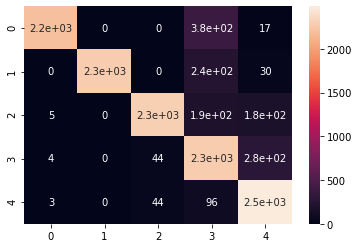

In [95]:
print(classification_report(y_pred,y_test))
conf_mat = confusion_matrix(y_test,y_pred)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True) 

# SVC: Accuracy score : 0.88 F1 score : 0.91

In [98]:
ob2  =  DecisionTreeClassifier()
ob2.fit(X_train,Y_train)
y_pred_ = ob2.predict(x_test)

print(accuracy_score(y_test,y_pred_))

0.8774322046882181


              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2231
           1       0.89      1.00      0.94      2283
           2       0.87      0.92      0.89      2528
           3       0.89      0.70      0.78      3278
           4       0.89      0.86      0.87      2734

    accuracy                           0.88     13054
   macro avg       0.88      0.89      0.88     13054
weighted avg       0.88      0.88      0.87     13054



<AxesSubplot:>

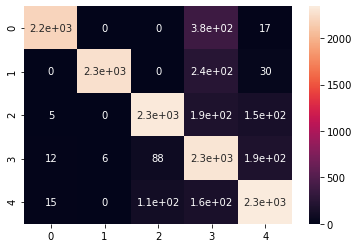

In [99]:
print(classification_report(y_pred_,y_test))
conf_mat = confusion_matrix(y_test,y_pred_)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True) 

# Dtc: Accuracy score: 0.87 F1 score:0.91

In [101]:
ob3  =  KNeighborsClassifier()
ob3.fit(X_train,Y_train)
y_pred_k = ob3.predict(x_test)

print(accuracy_score(y_test,y_pred_k))

0.82020836525203


              precision    recall  f1-score   support

           0       0.85      0.94      0.89      2343
           1       0.91      0.95      0.93      2441
           2       0.85      0.92      0.88      2493
           3       0.89      0.59      0.71      3913
           4       0.61      0.86      0.71      1864

    accuracy                           0.82     13054
   macro avg       0.82      0.85      0.82     13054
weighted avg       0.84      0.82      0.82     13054



<AxesSubplot:>

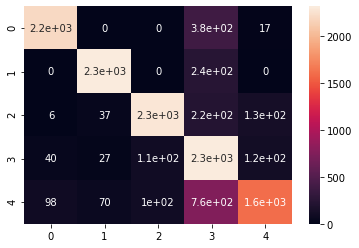

In [102]:
print(classification_report(y_pred_k,y_test))
conf_mat = confusion_matrix(y_test,y_pred_k)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True) 

# Knn : Accuracy score : 0.82 , F1 score:0.89

In [103]:
from sklearn.model_selection import GridSearchCV

# Hyper parametric tuning of SVC

In [106]:
param_grid = {'kernel': ['rbf','poly'],'C': [0.1, 1, 10]} 

In [107]:
grid = GridSearchCV(SVC(), param_grid, refit = True)
  


In [77]:
grid.fit(X_train, Y_train)


  

GridSearchCV(estimator=SVC(), param_grid={'kernel': ['rbf', 'poly'],'C': [0.1 , 1 , 10]}


In [75]:
print(grid.best_params_)


{'C': 0.1, 'kernel': 'rbf'}


In [76]:
grid_predictions = grid.predict(x_test)
print(accuracy_score(y_test, grid_predictions))


0.8872321346482381


# Accuracy score : 0.88